### VED index clustering - python-only pipeline



In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Mythical code button"></form>''')

In [2]:
import scipy
import netCDF4 as nc
import numpy as np
import pickle
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import cmocean as cm
import pipvis as vp
from importlib import reload

import sys
sys.path.append('./extraction_scripts')
import map_fxn as mf
reload(vp)


<module 'pipvis' from '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/pipvis.py'>

## masking edges

In [3]:
# bath = '/results/nowcast-sys/NEMO-forcing/grid/mesh_mask_SalishSea2.nc'
# grid = mf.import_bathy(bath)
# fmask = (grid.fmask[0,0,:,:]) 

# stn_x, stn_y = mf.make_stns(10)
# d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)

# d_stn_xar = np.array(d_stn_x)
# d_stn_yar = np.array(d_stn_y)

# edge = np.where((d_stn_xar<=10) | (d_stn_yar>=888))
# np.squeeze(edge)
# np.shape(edge)
# edgear = np.array(edge)
# edgear = edgear[0]

# d_stn_xar =np.delete(d_stn_xar,edge)
# d_stn_yar = np.delete(d_stn_yar,edge)

# print(np.size(d_stn_xar))



#### agglomerate signals extracted and save as .pkl, for year in 2013-2016

In [4]:
# # do this for years 2013  to 2016
# years = ['2013','2014','2015','2016']

# for year in years:
#     if year == '2016':
#         noday = 366
#     if year != '2016':
#         noday = 365
        
#     print(year)
#     basedir = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/'


#     varfolder = 'VED_TS'
#     tname = './pkls/ved_datamat_'+year+'.pkl'
#     signalmat = np.zeros([np.size(d_stn_xar),noday])
#     count = 0 
#     for i in range(0,580):
        
#         if i not in edgear:

#             pattern  = f'stn_{i}avg_ved_sp10.nc' #stn_0avg_ved_sp10.nc
#             tdat = nc.Dataset(basedir+year +'/'+ varfolder +'/'+pattern)
#             signalmat[count,:] = tdat['daily_ved'][:]
#             count = count+1

#     pickle.dump(signalmat, open(tname, 'wb'))


## open the resulting signalmats, cluster from 2-N (N=100) clusters, save linkage matrix and cluster matrices, visualise dendrograms

In [5]:
# for year in years:
#     print(year)
#     signalmat = pickle.load(open('./pkls/ved_datamat_'+year+'.pkl', 'rb'))

#     Z = linkage(signalmat, 'ward')
#     pickle.dump(Z, open('./pkls/ved_linkmat_'+year+'.pkl', 'wb'))
    
#     clustermat = np.zeros([100,np.size(d_stn_xar)])                           
#     for k in range(0,100): 
#         clustermat[k,:] = fcluster(Z, k+1, criterion='maxclust')
#     pickle.dump(clustermat, open('./pkls/ved_clustmat_'+year+'.pkl', 'wb'))

In [6]:
# fact = 1
# ms = 4
# markersize = 10
# legfontsize = 8

# fig = plt.figure(figsize=(10*fact, 10*fact))

# #####halo
# ax1 = plt.subplot2grid((2,2),(0,0))
# Z = pickle.load(open('./pkls/halo_linkmat_2013.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')

# ax1 = plt.subplot2grid((2,2),(0,1))
# Z = pickle.load(open('./pkls/halo_linkmat_2014.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')

# ax1 = plt.subplot2grid((2,2),(1,0))
# Z = pickle.load(open('./pkls/halo_linkmat_2015.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')

# ax1 = plt.subplot2grid((2,2),(1,1))
# Z = pickle.load(open('./pkls/halo_linkmat_2016.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')

# plt.suptitle('VED Hierarchical Clustering Dendrograms \n (truncated, max. clusters = 25)', y = 1.01)
# plt.tight_layout()
# plt.show()

# var = 'VED'
# fig.savefig(f'./paper_figs/{var}_dendrograms.pdf', bbox_inches='tight')


#### 'objective' measures of clustering are sometimes hard to defend

##### one way to circumvent this obvious problem is to look manually at the visual clusters provided


## 2013

In [7]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/ved_linkmat_2013.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2013'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2013','ved',2)
# vp.clusters(axs[0,2],'2013','ved',3)
# vp.clusters(axs[0,3],'2013','ved',4)
# vp.clusters(axs[0,4],'2013','ved',5)

# vp.clusters(axs[1,0],'2013','ved',6)
# vp.clusters(axs[1,1],'2013','ved',7)
# vp.clusters(axs[1,2],'2013','ved',8)
# vp.clusters(axs[1,3],'2013','ved',9)
# vp.clusters(axs[1,4],'2013','ved',10)

# vp.clusters(axs[2,0],'2013','ved',11)
# vp.clusters(axs[2,1],'2013','ved',12)
# vp.clusters(axs[2,2],'2013','ved',13)
# vp.clusters(axs[2,3],'2013','ved',14)
# vp.clusters(axs[2,4],'2013','ved',15)

# plt.tight_layout()

# var = 'VED'
# year = 2013
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')



## 2014

In [8]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/ved_linkmat_2014.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2014'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2014','ved',2)
# vp.clusters(axs[0,2],'2014','ved',3)
# vp.clusters(axs[0,3],'2014','ved',4)
# vp.clusters(axs[0,4],'2014','ved',5)

# vp.clusters(axs[1,0],'2014','ved',6)
# vp.clusters(axs[1,1],'2014','ved',7)
# vp.clusters(axs[1,2],'2014','ved',8)
# vp.clusters(axs[1,3],'2014','ved',9)
# vp.clusters(axs[1,4],'2014','ved',10)

# vp.clusters(axs[2,0],'2014','ved',11)
# vp.clusters(axs[2,1],'2014','ved',12)
# vp.clusters(axs[2,2],'2014','ved',13)
# vp.clusters(axs[2,3],'2014','ved',14)
# vp.clusters(axs[2,4],'2014','ved',15)

# plt.tight_layout()
# year = 2014
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')



## 2015 

In [9]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/ved_linkmat_2015.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2015'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2015','ved',2)
# vp.clusters(axs[0,2],'2015','ved',3)
# vp.clusters(axs[0,3],'2015','ved',4)
# vp.clusters(axs[0,4],'2015','ved',5)

# vp.clusters(axs[1,0],'2015','ved',6)
# vp.clusters(axs[1,1],'2015','ved',7)
# vp.clusters(axs[1,2],'2015','ved',8)
# vp.clusters(axs[1,3],'2015','ved',9)
# vp.clusters(axs[1,4],'2015','ved',10)

# vp.clusters(axs[2,0],'2015','ved',11)
# vp.clusters(axs[2,1],'2015','ved',12)
# vp.clusters(axs[2,2],'2015','ved',13)
# vp.clusters(axs[2,3],'2015','ved',14)
# vp.clusters(axs[2,4],'2015','ved',15)

# plt.tight_layout()

# year = 2015
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


## 2016

In [10]:
# reload(vp)

# fact = 0.9

# #fig = plt.figure(figsize=(15*fact, 15*fact))
# fig, axs = plt.subplots(3,5,figsize=(18*fact,15*fact))

# plt.subplot(3,5,1)
# Z = pickle.load(open('./pkls/ved_linkmat_2016.pkl', 'rb'))
# dendrogram(
#     Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=25,  # show only the last p merged clusters
#     leaf_rotation=90.,
#     leaf_font_size=12.,
#     color_threshold = 0,
#     show_contracted=True,  # to get a distribution impression in truncated branches
# )
# plt.title('year 2016'); plt.xlabel('cluster size'); plt.ylabel('distance')


# vp.clusters(axs[0,1],'2016','ved',2)
# vp.clusters(axs[0,2],'2016','ved',3)
# vp.clusters(axs[0,3],'2016','ved',4)
# vp.clusters(axs[0,4],'2016','ved',5)

# vp.clusters(axs[1,0],'2016','ved',6)
# vp.clusters(axs[1,1],'2016','ved',7)
# vp.clusters(axs[1,2],'2016','ved',8)
# vp.clusters(axs[1,3],'2016','ved',9)
# vp.clusters(axs[1,4],'2016','ved',10)

# vp.clusters(axs[2,0],'2016','ved',11)
# vp.clusters(axs[2,1],'2016','ved',12)
# vp.clusters(axs[2,2],'2016','ved',13)
# vp.clusters(axs[2,3],'2016','ved',14)
# vp.clusters(axs[2,4],'2016','ved',15)

# plt.tight_layout()

# year = 2016
# fig.savefig(f'./paper_figs/{var}_{year}_clustering.png', bbox_inches='tight')


#### plot JUST THIS

In [11]:
cl_2013 = pickle.load(open('./pkls/ved_clustmat_2013.pkl', 'rb'))
cl_2014 = pickle.load(open('./pkls/ved_clustmat_2014.pkl', 'rb'))
cl_2015 = pickle.load(open('./pkls/ved_clustmat_2015.pkl', 'rb'))
cl_2016 = pickle.load(open('./pkls/ved_clustmat_2016.pkl', 'rb'))
sig_2013 = pickle.load(open('./pkls/ved_datamat_2013.pkl', 'rb'))
sig_2014 = pickle.load(open('./pkls/ved_datamat_2014.pkl', 'rb'))
sig_2015 = pickle.load(open('./pkls/ved_datamat_2015.pkl', 'rb'))
sig_2016 = pickle.load(open('./pkls/ved_datamat_2016.pkl', 'rb'))
cldes_2013_reass = pickle.load(open('./pkls/VED_clno_5_2013_reass.pkl', 'rb'))
cldes_2014_reass= pickle.load(open('./pkls/VED_clno_5_2014_reass.pkl', 'rb'))
cldes_2015_reass= pickle.load(open('./pkls/VED_clno_5_2015_reass.pkl', 'rb'))
cldes_2016_reass= pickle.load(open('./pkls/VED_clno_5_2016_reass.pkl', 'rb'))

## visualize original clusterings by size and do manual relabeling

ModuleNotFoundError: No module named 'salishsea_tools'

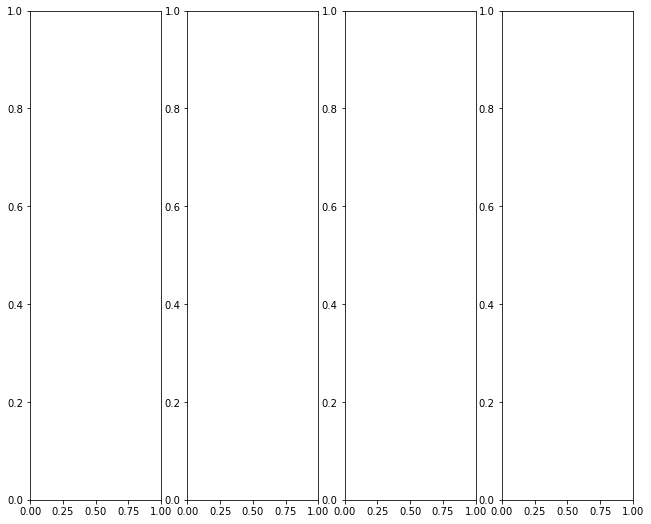

In [12]:
fact = 0.6
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters(axs[0],'2013','ved',5)
vp.clusters(axs[1],'2014','ved',5)
vp.clusters(axs[2],'2015','ved',5)
# vp.clusters(axs[3],'2016','ved',5)

var = 'ved'
year = 2013
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2013_reass = np.zeros_like(cl_this)
cldes_2013_reass[cl_this == 1] = 3
cldes_2013_reass[cl_this == 2] = 5
cldes_2013_reass[cl_this == 3] = 1
cldes_2013_reass[cl_this == 4] = 4
cldes_2013_reass[cl_this == 5] = 2

year = 2014
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2014_reass = np.zeros_like(cl_this)
cldes_2014_reass[cl_this == 1] = 4
cldes_2014_reass[cl_this == 2] = 2
cldes_2014_reass[cl_this == 3] = 3
cldes_2014_reass[cl_this == 4] = 1
cldes_2014_reass[cl_this == 5] = 5

year = 2015
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2015_reass = np.zeros_like(cl_this)
cldes_2015_reass[cl_this == 1] = 4
cldes_2015_reass[cl_this == 2] = 1
cldes_2015_reass[cl_this == 3] = 2
cldes_2015_reass[cl_this == 4] = 5
cldes_2015_reass[cl_this == 5] = 3

year = 2016
tpkl = f'./pkls/{var}_clustmat_{year}.pkl'  
cl = pickle.load(open(tpkl, 'rb'))
no_clusters = 5    
cl_this = cl[no_clusters-1,:]
cldes_2016_reass = np.zeros_like(cl_this)
cldes_2016_reass[cl_this == 1] = 3
cldes_2016_reass[cl_this == 2] = 5
cldes_2016_reass[cl_this == 3] = 1
cldes_2016_reass[cl_this == 4] = 4
cldes_2016_reass[cl_this == 5] = 2





## chceck that reassigning worked

In [ ]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
    
fact = 0.5    
reload(vp)
fig, axs = plt.subplots(1,4,figsize=(18*fact,15*fact))

vp.clusters_basic(axs[0],'2013','ved',5,cldes_2013_reass, colors)
vp.clusters_basic(axs[1],'2014','ved',5,cldes_2014_reass, colors)
vp.clusters_basic(axs[2],'2015','ved',5,cldes_2015_reass, colors)
vp.clusters_basic(axs[3],'2016','ved',5,cldes_2016_reass, colors)

In [ ]:
colors = ['white',
          'goldenrod',
          'forestgreen',
          'deepskyblue',
          'red',
          'midnightblue',
          'deepskyblue','gray','peru',
'olive','sandybrown','teal','pink','tan',
'yellow','thistle']
    
reload(vp)
fact = 0.8
fig, axs = plt.subplots(1,4,figsize=(18*fact,10*fact))

vp.clusters_basic(axs[0],'2013','ved',5,cldes_2013_reass, colors)
axs[0].set_xlim([140,390])
axs[0].set_ylim([140,390])
vp.clusters_basic(axs[1],'2014','ved',5,cldes_2014_reass, colors)
axs[1].set_xlim([140,390])
axs[1].set_ylim([140,390])
vp.clusters_basic(axs[2],'2015','ved',5,cldes_2015_reass, colors)
axs[2].set_xlim([140,390])
axs[2].set_ylim([140,390])
vp.clusters_basic(axs[3],'2016','ved',5,cldes_2016_reass, colors)
axs[3].set_xlim([140,390])
axs[3].set_ylim([140,390])


fig.savefig(f'./paper_figs/VED_harocloseup_clustering.png', bbox_inches='tight')


In [ ]:
pickle.dump(cldes_2013_reass, open('./pkls/ved_clno_5_2013_reass.pkl', 'wb'))
pickle.dump(cldes_2014_reass, open('./pkls/ved_clno_5_2014_reass.pkl', 'wb'))
pickle.dump(cldes_2015_reass, open('./pkls/ved_clno_5_2015_reass.pkl', 'wb'))
pickle.dump(cldes_2016_reass, open('./pkls/ved_clno_5_2016_reass.pkl', 'wb'))

In [ ]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 0.6
t_ylab = 'm s$^{-2}$'

fact = 2
fig = plt.figure(figsize=(7*fact, 7*fact))

ax1 = plt.subplot2grid((7,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','ved',5,cldes_2013_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','ved',5,cldes_2014_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','ved',5,cldes_2015_reass, colors)
ax1 = plt.subplot2grid((7,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','ved',5,cldes_2016_reass, colors)

ax1 = plt.subplot2grid((7,4), (4,0), colspan=2, rowspan=1)
clustdes = [1,1,1,1]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[1],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim+0.1,0.1));
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (4,2), colspan=2, rowspan=1) 
clustdes = [2,2,2,2]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[2],\
                linestyle = linestyl[i], label = labs[i])

ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim+0.1,0.1));
ax1.legend(loc = 'best', ncol = 2)

ax1 = plt.subplot2grid((7,4), (5,0), colspan=2, rowspan=1) 
clustdes = [3,3,3,3]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[3],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim+0.1,0.1));

ax1 = plt.subplot2grid((7,4), (5,2), colspan=2, rowspan=1) 
clustdes = [4,4,4,4]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[4],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim+0.1,0.1));

ax1 = plt.subplot2grid((7,4), (6,0), colspan=2, rowspan=1) 
clustdes = [5,5,5,5]
for i in range(0,len(clustdes)):
    tclmat = clustmats[i]; clustno = clustnos[i]
    tmean = vp.cluster_patterns_mean(sigmats[i],tclmat,clustdes[i],nodays[i])
    ax1.plot(np.arange(0,nodays[i],1),np.squeeze(tmean), color = colors[5],\
                linestyle = linestyl[i], label = labs[i])
ax1.set_xlim([0,365]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_yticks(np.arange(0,t_ylim+0.1,0.1));


plt.tight_layout()

var = 'VED'
fig.savefig(f'./paper_figs/{var}_4Y_CLUSTERS_SEP.png', bbox_inches='tight')

In [ ]:
linestyl = ['-',':','-.','--']
sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
labs = ['2013','2014','2015','2016']
t_ylim = 0.6
t_ylab = 'm s$^{-2}$'

fact = 1.5
fig = plt.figure(figsize=(7*fact, 9.25*fact))

ax1 = plt.subplot2grid((8,4), (0,0), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2013','ved',5,cldes_2013_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,1), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2014','ved',5,cldes_2014_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,2), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2015','ved',5,cldes_2015_reass, colors, legend = False)
ax1 = plt.subplot2grid((8,4), (0,3), colspan=1, rowspan=4) 
vp.clusters_basic(ax1,'2016','ved',5,cldes_2016_reass, colors, legend = False)

ax1 = plt.subplot2grid((8,4), (4,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 0; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2013', y = 0.7)

ax1 = plt.subplot2grid((8,4), (5,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5,6]; tn = 1; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2014', y = 0.7)

ax1 = plt.subplot2grid((8,4), (6,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 2; noday = 365
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks([]);# ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2015', y = 0.7)

ax1 = plt.subplot2grid((8,4), (7,0), colspan=4, rowspan=1)
clustdes = [1,2,3,4,5]; tn = 3; noday = 366
for i in range(0,len(clustdes)):
    tclmat = clustmats[tn]; clustno = clustnos[tn]
    tmean = vp.cluster_patterns_mean(sigmats[tn],tclmat,clustdes[i],noday)
    ax1.plot(np.arange(0,noday,1),np.squeeze(tmean), color = colors[i+1],\
                linestyle = '-')
ax1.set_xlim([0,noday]); ax1.set_ylim([0,t_ylim]); ax1.set_ylabel(t_ylab)
ax1.set_xticks(np.arange(0,390,30)); ax1.set_xlabel('days of year')
ax1.set_title('Signals year 2016', y = 0.7)


plt.tight_layout()

var = 'VED'
fig.savefig(f'./paper_figs/{var}_4Y_YEARS_SEP.png', bbox_inches='tight')

In [ ]:
def add_subplot_border(ax, width=1, color=None ):

    fig = ax.get_figure()

    # Convert bottom-left and top-right to display coordinates
    x0, y0 = ax.transAxes.transform((0, 0))
    x1, y1 = ax.transAxes.transform((1, 1))

    # Convert back to Axes coordinates
    x0, y0 = ax.transAxes.inverted().transform((x0, y0))
    x1, y1 = ax.transAxes.inverted().transform((x1, y1))

    rect = plt.Rectangle(
        (x0, y0), x1-x0, y1-y0,
        color=color,
        transform=ax.transAxes,
        zorder=-1,
        lw=2*width+1,
        fill=None,
    )
    fig.patches.append(rect)

In [ ]:
fact = 0.7
tylim = 0.36

fs = 12
#season definitions
#spring march 1 to may 31
spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
aut_st = 243; aut_e = 334;

sigmats = [sig_2013,sig_2014,sig_2015,sig_2016]
clustmats = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
yrs = [2013,2014,2015,2016]
clustnos = [5,5,5,5]
nodays =  [365,365,365,366]
clustdes = [1,2,3,4,5]; 
fig = plt.figure(figsize=(19*fact, 4.6*fact))

ax1 = plt.subplot2grid((1,5), (0,0), colspan=1, rowspan=1) 
#noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]; noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean); yrstd = np.nanstd(tmean)
        ax1.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')

ax1.set_xlim([2012.5,2016.5])
ax1.set_ylim([0,tylim])
ax1.yaxis.grid(True);
ax1.set_xticks([2013,2014,2015,2016])
ax1.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax1.set_ylabel('mean vertical eddy diffusivity \n [m s$^{-2}$]')
ax1.set_title('FULL YEAR', fontsize = fs)
add_subplot_border(ax1, width=2, color='black' )

ax2 = plt.subplot2grid((1,5), (0,1), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        yrmean = np.nanmean(tmean[spr_st:spr_e]); yrstd = np.nanstd(tmean[spr_st:spr_e])
        ax2.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,tylim]);
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('SPRING', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,2), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for j in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[j],noday)
        yrmean = np.nanmean(tmean[sum_st:sum_e]); yrstd = np.nanstd(tmean[sum_st:sum_e])
        ax2.errorbar(yr+(j*0.04), yrmean, yerr=yrstd, color=colors[j+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,tylim])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('SUMMER', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,3), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for j in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[j],noday)
        yrmean = np.nanmean(tmean[aut_st:aut_e]); yrstd = np.nanstd(tmean[aut_st:aut_e])
        ax2.errorbar(yr+(j*0.04), yrmean, yerr=yrstd, color=colors[j+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,tylim])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('AUTUMN', fontsize = fs)

ax2 = plt.subplot2grid((1,5), (0,4), colspan=1, rowspan=1) 
clustdes = [1,2,3,4,5]; tn = 3; #noday = 366
for i in range(0,4):
    yr = yrs[i]; noday = nodays[i]
    tclmat = clustmats[i]; clustno = clustnos[i]; sigmat = sigmats[i]
    noday = nodays[i]
    for i in range(0,len(clustdes)):
        tmean = vp.cluster_patterns_mean(sigmat,tclmat,clustdes[i],noday)
        wintmean = np.concatenate((tmean[0:spr_st],tmean[aut_e:(np.size(tmean)-1)]),axis = 0)
        yrmean = np.nanmean(wintmean); yrstd = np.nanstd(wintmean)
        ax2.errorbar(yr+(i*0.04), yrmean, yerr=yrstd, color=colors[i+1], fmt='o')
ax2.yaxis.grid(True)
ax2.set_xlim([2012.5,2016.5]); ax2.set_ylim([0,tylim])
ax2.set_yticklabels([])
ax2.set_xticks([2013,2014,2015,2016])
ax2.set_xticklabels([2013,2014,2015,2016], fontsize = fs)
ax2.set_title('WINTER', fontsize = fs)
plt.suptitle('Mean vertical eddy diffusivity', fontsize = fs+3, y = 1.07)
plt.tight_layout()


In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy import signal, fft
from datetime import datetime
from salishsea_tools import places

%matplotlib inline

#tmean = vp.cluster_patterns_mean(sig_2013,cldes_2013_reass,4,365)


In [ ]:
# Construct the frequency array (Nyquist frequency for hourly data in cph is 0.5)
xlim, ylim = [0, 0.5], [0.01,25]
frequency = np.linspace(-0.5, 0.5, 365)

# Perform the fft and apply fftshift (abs gives the real component)
# We have detrended ssh here by subtracting the mean
# Units are amplitude/frequency, or in this case m/h^{-1}
amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean())))

# Make figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(figsize=(10, 10), nrows = 2, ncols =2)


# Plot the results
for a in range(0,4):
    taxes = [ax1,ax2,ax3,ax4]
    sigs = [sig_2013,sig_2014,sig_2015,sig_2016]; ndays = [365,365,365,366]
    cls = [cldes_2013_reass,cldes_2014_reass,cldes_2015_reass,cldes_2016_reass]
    ax = taxes[a]; sig = sigs[a]; cl = cls[a]
    yrs = [2013,2014,2015,2016]
    nday = ndays[a]; yr = yrs[a]
    frequency = np.linspace(-0.5, 0.5, nday)
    for i in range(0,5):
        tmean = vp.cluster_patterns_mean(sig,cl,i+1,nday)
        amplitude = abs(np.fft.fftshift(np.fft.fft(tmean - tmean.mean())))
        ax.plot(frequency, amplitude, color = colors[i+1], marker = 'o', linestyle = '')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_yscale('log')
    ax.set_xlabel('Frequency [cycles d$^{-1}$]')
    ax.set_ylabel('Amplitude [m s$^{-2}$ d$^{-1}$]')
    ax.set_title('VED fft for year '+str(yr))



# Overlay semidiurnal and diurnal frequencies
for hour in [-7, -14, -28, 7, 14, 28]:
    ax.plot([1/hour, 1/hour], ylim, 'k--'); ax2.plot([1/hour, 1/hour], ylim, 'k--');
    ax3.plot([1/hour, 1/hour], ylim, 'k--'); ax4.plot([1/hour, 1/hour], ylim, 'k--')

plt.tight_layout()
plt.show()

In [ ]:
fft.shift

In [ ]:
import scipy

In [ ]:
scipy.fft.fftsh

In [ ]:
np.fft.